# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(15,8)})

In [2]:
# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
163,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675,2
86,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495,1
97,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428,1
13,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150,0
21,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770,0
68,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750,1
119,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564,1
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,1
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380,1
129,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580,1


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Alcohol                     178 non-null    float64
 1   Malic_acid                  178 non-null    float64
 2   Ash                         178 non-null    float64
 3   Alcalinity                  178 non-null    float64
 4   Magnesium                   178 non-null    int64  
 5   Phenols                     178 non-null    float64
 6   Flavanoids                  178 non-null    float64
 7   Nonflavanoids               178 non-null    float64
 8   Proanthocyanins             178 non-null    float64
 9   Color_intensity             178 non-null    float64
 10  Hue                         178 non-null    float64
 11  OD280_315_of_diluted_wines  178 non-null    float64
 12  Proline                     178 non-null    int64  
 13  WineVariety                 178 non

In [4]:
data['WineVariety']=data['WineVariety'].astype('category')

In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
features=['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline']

target='WineVariety'

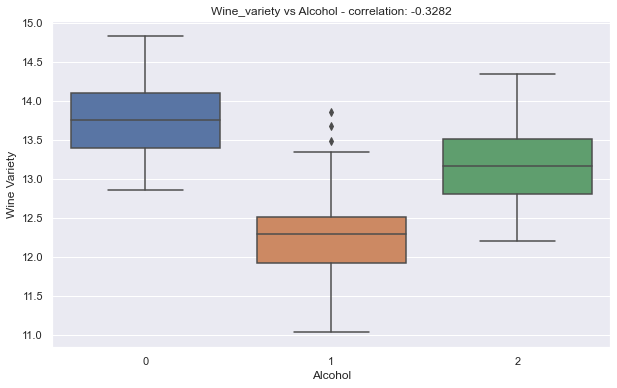

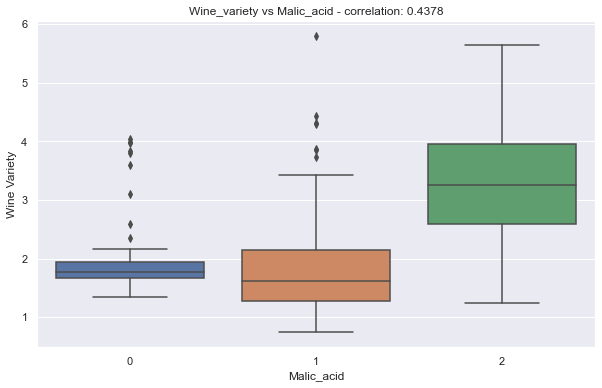

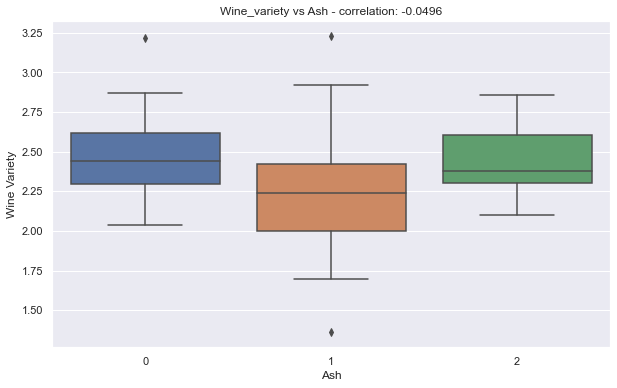

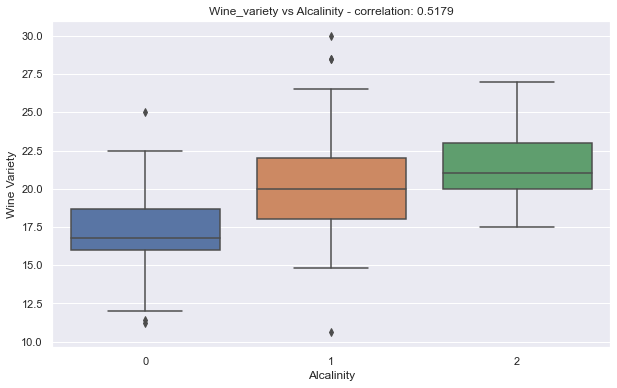

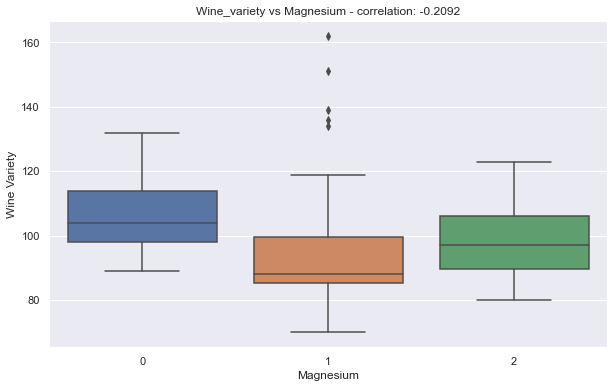

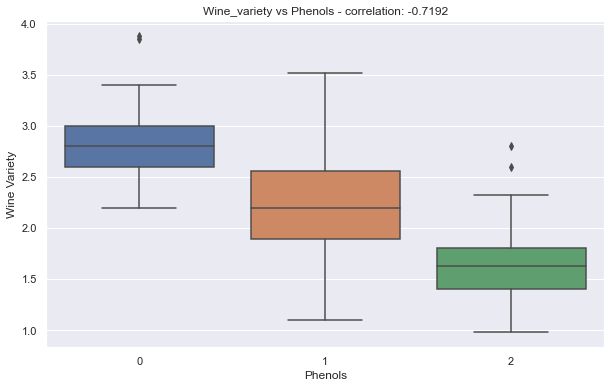

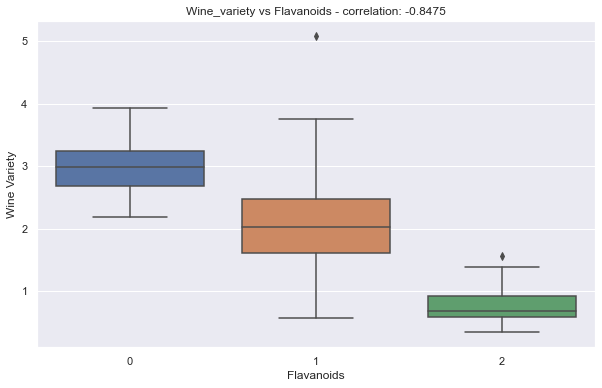

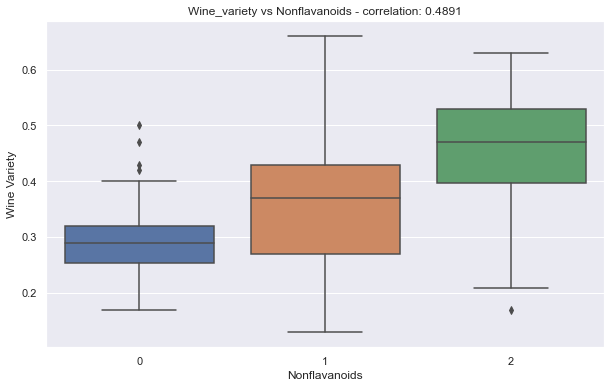

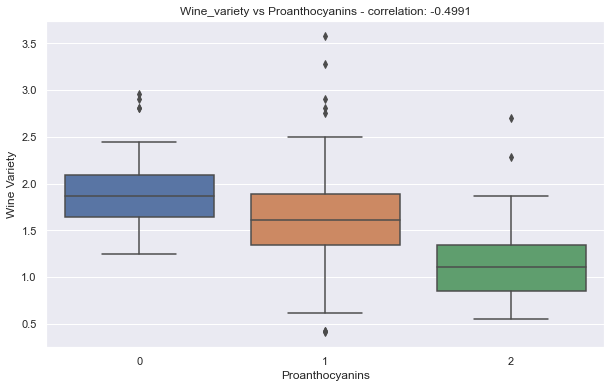

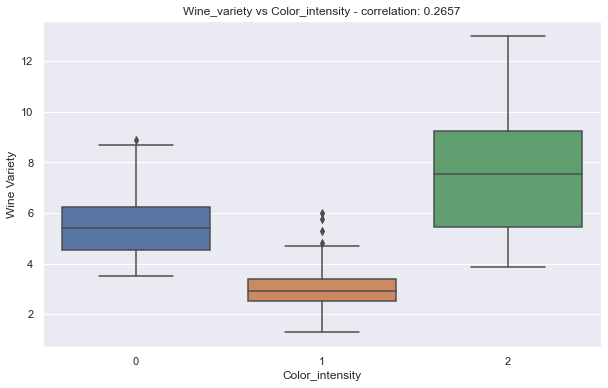

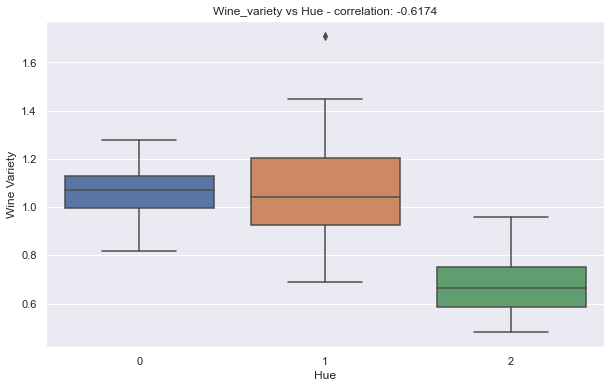

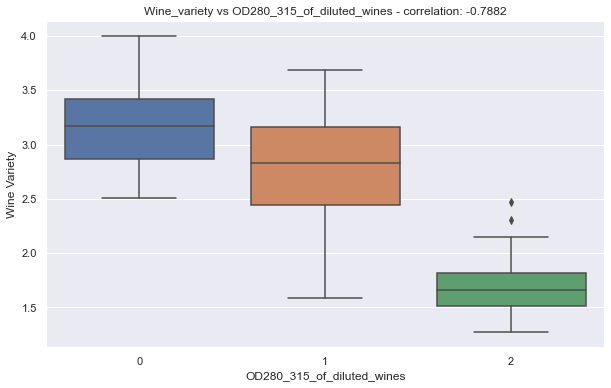

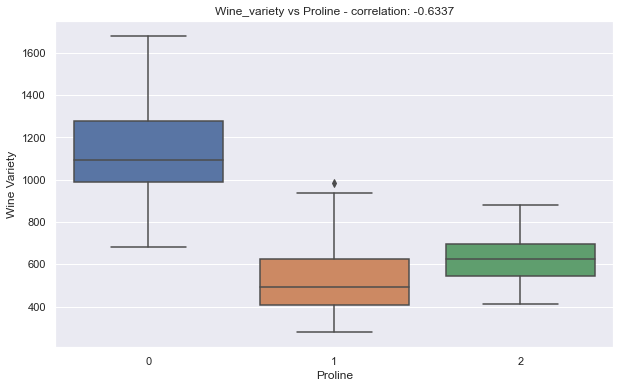

In [8]:
for col in features:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    feature = data[col]
    label = data[target]
    correlation = feature.corr(label)
    sns.boxplot(x=label, y=feature)
    plt.xlabel(col)
    plt.ylabel('Wine Variety')
    ax.set_title('Wine_variety vs ' + col + ' - correlation: ' + str(correlation.round(4)))
    plt.show()

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

In [9]:
# Your code to evaluate data, and train and evaluate a classification model

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [11]:
X=data[features]
y=data[target]

#splitting the dataset
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"shape of X_train is {X_train.shape}")
print(f"shape of X_test is {X_test.shape}")
print(f"shape of y_train is {y_train.shape}")
print(f"shape of y_test is {y_test.shape}")

shape of X_train is (124, 13)
shape of X_test is (54, 13)
shape of y_train is (124,)
shape of y_test is (54,)


In [12]:
reg=0.1
model_lr= make_pipeline(
    StandardScaler(),
    LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000,random_state=42)
)

model_rfc= make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators = 10, random_state = 42))


model_dTC= make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=42)
)

model_svm=make_pipeline(
    StandardScaler(),
    SVC(probability=True,random_state=42,C=1/reg))

In [13]:
models=[model_lr,model_rfc,model_dTC,model_svm]
recall_list=[]
accuracy_list=[]
precision_list=[]
model_name=[]
metrics_dict={}
for model in models:

    model.fit(X_train,y_train)
    predicted_values=model.predict(X_test)

    recall=recall_score(y_test,predicted_values,average='macro')
    recall_list.append(recall)

    accuracy=accuracy_score(y_test,predicted_values)
    accuracy_list.append(accuracy)

    model_=model.named_steps.keys()
    model_name.append(model_)

    precision=precision_score(y_test,predicted_values,average='macro')
    precision_list.append(precision)

    metrics_dict['model']=model_name
    metrics_dict['recall']=recall_list
    metrics_dict['accuracy']=accuracy_list
    metrics_dict['precision']=precision_list

metrics_df=pd.DataFrame(metrics_dict)

In [14]:
metrics_df

,model,recall,accuracy,precision
0,"(standardscaler, logisticregression)",0.984127,0.981481,0.977778
1,"(standardscaler, randomforestclassifier)",0.928571,0.925926,0.926901
2,"(standardscaler, decisiontreeclassifier)",0.958647,0.962963,0.967305
3,"(standardscaler, svc)",0.976190,0.981481,0.984848


#### Best model seems to be Logistic Regression.

In [15]:
best_model=model_lr
best_model.fit(X_train,y_train)
predictions=best_model.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix,classification_report

clf=classification_report(y_test,predictions)
print(clf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



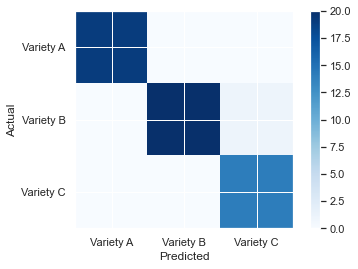

In [17]:
%matplotlib inline
cf_mx=confusion_matrix(y_test,predictions)

classes=['Variety A','Variety B','Variety C']

#plotting confusion matrix
plt.imshow(cf_mx,cmap="Blues",interpolation='nearest')
plt.colorbar()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)
plt.xlabel("Predicted")
plt.ylabel("Actual");


Average AUC: 1.0


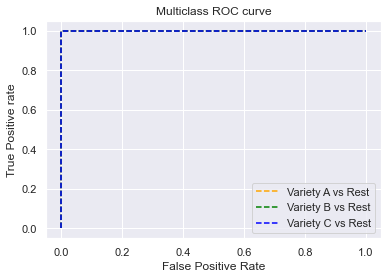

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score


    # Get class probability scores
probabilities = model.predict_proba(X_test)

auc = roc_auc_score(y_test,probabilities, multi_class='ovr')
print('Average AUC:', auc)

    # Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probabilities[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [19]:
# Your code to predict classes for the two new samples

In [20]:
import joblib

# Save the model as a pickle file
filename = './wine_classifer.pkl'
joblib.dump(best_model, filename)

# Load the saved model
model = joblib.load(filename)

# Get predictions for two new wine samples
x_feat = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

# Call the web service, passing the input data
predictions = model.predict(x_feat)

print(f"{x_feat[0]}  {predictions[0]} {classes[predictions[0]]}")
print(f"{x_feat[1]}  {predictions[1]} {classes[predictions[1]]}")

[1.372e+01 1.430e+00 2.500e+00 1.670e+01 1.080e+02 3.400e+00 3.670e+00
 1.900e-01 2.040e+00 6.800e+00 8.900e-01 2.870e+00 1.285e+03]  0 Variety A
[1.237e+01 9.400e-01 1.360e+00 1.060e+01 8.800e+01 1.980e+00 5.700e-01
 2.800e-01 4.200e-01 1.950e+00 1.050e+00 1.820e+00 5.200e+02]  1 Variety B
